In [1]:
import time
from selenium import webdriver
from time import sleep
from selenium.common.exceptions import NoSuchElementException
import json
import sys
import pandas as pd
from fuzzywuzzy import fuzz
import numpy as np

c:\users\gorer\appdata\local\programs\python\python36\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
driver = webdriver.Chrome(executable_path=r"chromedriver.exe")

In [2]:
import time
from threading import Thread
import pyautogui
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

hostname = "zproxy.lum-superproxy.io"
port = "22225"
proxy_username = "lum-customer-c_4c2271fb-zone-datacenter_hk-ip-103.240.165.100"
proxy_password = "jmxkc4ho6j45"

chrome_options = Options()
chrome_options.add_argument('--proxy-server={}'.format(hostname + ":" + port))
driver = webdriver.Chrome(options=chrome_options)


def enter_proxy_auth(proxy_username, proxy_password):
    time.sleep(1)
    pyautogui.typewrite(proxy_username)
    pyautogui.press('tab')
    pyautogui.typewrite(proxy_password)
    pyautogui.press('enter')


def open_a_page(driver, url):
    driver.get(url)


Thread(target=open_a_page, args=(driver, "http://www.google.com/")).start()
Thread(target=enter_proxy_auth, args=(proxy_username, proxy_password)).start()

In [3]:
driver.get('https://deliveroo.hk/zh/menu/hong-kong/sai-ying-pun/river-sichuan-restaurant?utm_medium=affiliate&utm_source=google_maps_link')

In [9]:
l.replace("deliveroo.hk","deliveroo.hk/zh")

'https://deliveroo.hk/zh/en/menu/hong-kong/sai-ying-pun/river-sichuan-restaurant?utm_medium=affiliate&utm_source=google_maps_link'

In [4]:
l = 'https://deliveroo.hk/en/menu/hong-kong/sai-ying-pun/river-sichuan-restaurant?utm_medium=affiliate&utm_source=google_maps_link'

In [4]:
driver.find_element_by_class_name("ccl-022adec8b2f34033").click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".ccl-022adec8b2f34033"}
  (Session info: chrome=91.0.4472.77)


In [6]:
driver.find_element_by_class_name("ccl-caaf537be0dac3d8").click()

In [15]:
restaurant_name = driver.find_element_by_class_name("restaurant__details").find_element_by_tag_name('h1').text
restaurant_name

'La Paloma'

In [28]:
rating = driver.find_element_by_class_name("orderweb__61671603").text.replace(')','').split('(')[0]
rating

'4.6'

In [29]:
total_rating = driver.find_element_by_class_name("orderweb__61671603").text.replace(')','').split('(')[1]
total_rating

'228 ratings'

In [9]:
cusine = driver.find_element_by_class_name("orderweb__8227a377").text.split("\n")
cusine

['Spanish',
 'Vegetarian',
 'Tapas',
 'Mediterranean',
 'Western',
 'Healthy',
 'Opens at 12:00',
 "1/F, SoHo 189, 189 Queen's Road West, Sai Ying Pun, Western District,, Hong Kong,",
 'View map']

In [40]:
description = driver.find_element_by_class_name("restaurant__details").find_element_by_tag_name('p').text
description

'Spanish Tapas & Paella restaurant. We offer for delivery our signatures dishes and those dishes that travel well to your doorstep. Get ready for our new items like Spanish pizza, suckling pig and paellas, hope you enjoy it!'

In [7]:
total_categories = len(driver.find_elements_by_class_name("orderweb__47414d10"))
total_categories

16

In [15]:
driver.find_element_by_class_name("orderweb__8227a377").text.split("\n")[-2]

"1/F, SoHo 189, 189 Queen's Road West, Sai Ying Pun, Western District,, Hong Kong,"

In [18]:
driver.find_element_by_class_name("orderweb__61671603").text.replace(')','').split('(')[1].split(" ")[0]

'228'

In [10]:
total_categories = len(driver.find_elements_by_class_name("orderweb__47414d10"))
categories = []
dish_names = []
dish_prices = []
dish_urls = []
for _ in np.arange(1,10,0.1):
    driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight/{_});")
    sleep(0.1)


for tc in range(total_categories):
    categories.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_tag_name('h3').text)
    
    len_dish_name = len(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3'))
    
    dish_name = []
    dish_price = []
    dish_url = []
    
    for dn in range(len_dish_name):
        try:
            dish_name.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_tag_name('p').text)
        except:
            dish_name.append('none')
        
        try:
            dish_price.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_class_name('orderweb__19b2cfab').find_element_by_tag_name('span').text.replace('$',''))
        except:
            dish_price.append('none')
            
        try:
            dish_url.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_class_name("orderweb__2cc612e1").find_element_by_class_name('ccl-45bd106b75353ec9').get_attribute('style').split('(')[1].split(')')[0].replace('"','').split('?')[0])
        except:
            dish_url.append('none')
        
    dish_names.append(dish_name)
    dish_prices.append(dish_price)
    dish_urls.append(dish_url)

In [12]:
categories

['最新推介 New Arrival',
 '招牌菜Restaurant Specials',
 '涼菜類Appetizers',
 '香辣類 Spicy',
 '泡椒類 Pickled Peppers',
 '干煸類 Dry Fried',
 '家常菜Family Dishes',
 '魚香類 Yu-Shiang (spicy garlic sauce)',
 '不辣類Non-Spicy',
 '素菜 vegetarian food',
 '主食類 Rice',
 '手工小食 hand-made snacks',
 '湯類Soup',
 '甜點Dessert',
 '酒精類',
 '飲品Drinks']

In [11]:
dish_names

[['特色麻辣雞煲(全隻雞）',
  '特色麻辣雞煲(半隻雞）',
  '麻辣牛腩煲',
  '麻辣香鍋 Spicy Incense Pot',
  '江湖桂花魚',
  '麻辣花甲',
  '涼拌鮮魚皮(蒜蓉)',
  '涼拌鮮魚皮(紅油)',
  '蒸饅頭(6件)配煉乳',
  '自家制-牛油火鍋湯底'],
 ['樟茶鴨 (半隻 Half)',
  '樟茶鴨 (全隻 Whole)',
  '水煮桂花魚',
  '水煮魚',
  '水煮田雞',
  '水煮牛肉',
  '水煮肉片',
  '毛血旺 Mao Xue Wang',
  '酸菜桂花魚',
  '酸菜魚',
  '酸菜嫩牛肉',
  '蕃茄桂花魚(不辣)',
  '蕃茄魚(不辣)'],
 ['重慶口水雞',
  '夫妻肺片',
  '蒜泥白肉',
  '紅油豬耳',
  '蒜蓉肚絲( 不辣)',
  '青椒皮蛋',
  '山椒鳳爪',
  '四川涼面(素)',
  '傷心涼粉(素)',
  '蒜蓉秋葵( 不辣)(素)',
  '涼拌木耳(素)',
  '酸辣青瓜(素)',
  '蒜泥青瓜 (不辣)(素)'],
 ['香辣一口牛', '辣子田雞', '辣子蝦', '重慶辣子雞', '辣子肥腸', '辣子雞軟骨'],
 ['泡椒田雞', '泡椒嫩牛肉', '泡椒肥腸', '泡椒豬肚', '泡椒生炒雞', '泡椒牛毛肚'],
 ['干煸田雞', '干煸牛肉', '干煸肥腸', '干煸花菜', '干煸四季豆', '干煸肉絲'],
 ['川式回鍋肉', '紅燒牛腩', '宮保雞丁', '家鄉小炒肉', '酸豆角炒肉碎', '麻婆豆腐', '螞蟻上樹', '青椒炒肉絲'],
 ['魚香茄子(素)', '魚香肉絲', '魚香牛肉', '魚香里脊'],
 ['川式椒鹽蝦(不辣)',
  '臘肉炒花菜(不辣)',
  '家鄉黃燜雞(不辣)',
  '家常豆腐(不辣)',
  '椒鹽里脊(不辣)',
  '糖醋里脊(不辣)',
  '糖醋雞丁(不辣)',
  '鍋筍炒肉絲(不辣)',
  '蕃茄炒肉片(不辣)',
  '西紅柿炒雞蛋(不辣)',
  '青椒炒雞蛋(不辣)',
  '肉末土豆絲(不辣)'],
 ['回鍋蓮藕片(素)', '清炒鍋筍絲(素)', '酸辣土豆絲(素)', '手撕包菜(素)', '青炒油麥菜(素)',

In [14]:
main = []

driver.get('https://deliveroo.hk/zh/menu/hong-kong/sai-ying-pun/river-sichuan-restaurant?utm_medium=affiliate&utm_source=google_maps_link')

try:
    driver.find_element_by_class_name("ccl-022adec8b2f34033").click()
except:
    pass

try:
    driver.find_element_by_class_name("ccl-022adec8b2f34033").click()
except:
    pass

try:
    driver.find_element_by_class_name("ccl-caaf537be0dac3d8").click()
except:
    pass

try:
    restaurant_name = driver.find_element_by_class_name("restaurant__details").find_element_by_tag_name('h1').text
except:
    restaurant_name = 'none'
    
try:    
    rating = driver.find_element_by_class_name("orderweb__61671603").text.replace(')','').split('(')[0]
except:
    rating = 'none'

try:
    total_rating = driver.find_element_by_class_name("orderweb__61671603").text.replace(')','').split('(')[1].split(" ")[0]
except:
    total_rating = 'none'

try:
    cusine = driver.find_element_by_class_name("orderweb__8227a377").text.split("\n")[:-3]
except:
    cusine = 'none'

try:
    address = driver.find_element_by_class_name("orderweb__8227a377").text.split("\n")[-2]
except:
    address = "none"
    
categories = []
dish_names = []
dish_prices = []
dish_urls = []

total_categories = len(driver.find_elements_by_class_name("orderweb__47414d10"))

for _ in np.arange(1,10,0.1):
    driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight/{_});")
    sleep(0.1)


for tc in range(total_categories):
    categories.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_tag_name('h3').text)
    
    len_dish_name = len(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3'))
    
    dish_name = []
    dish_price = []
    dish_url = []
    
    for dn in range(len_dish_name):
        try:
            dish_name.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_tag_name('p').text)
        except:
            dish_name.append('none')
        
        try:
            dish_price.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_class_name('orderweb__19b2cfab').find_element_by_tag_name('span').text.replace('$',''))
        except:
            dish_price.append('none')
            
        try:
            dish_url.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_class_name("orderweb__2cc612e1").find_element_by_class_name('ccl-45bd106b75353ec9').get_attribute('style').split('(')[1].split(')')[0].replace('"','').split('?')[0])
        except:
            dish_url.append('none')
        
    dish_names.append(dish_name)
    dish_prices.append(dish_price)
    dish_urls.append(dish_url)

print("making dict")
#making dictonary
data = {
 'url': driver.current_url,
 'restaurant_name': restaurant_name,
 'rating':rating,
 'total_rating':total_rating,
 'cusine':cusine,
 'categories':categories,
 'dish_names':dish_names,
 'dish_prices':dish_prices,
 'dish_urls':dish_urls   
 }


#append it to main data
main.append(data)
print("Making JSON")
#Open and save in json file
with open("deliveroo.json", 'w', encoding="utf-8") as f:
          json.dump(main, f,indent=4, ensure_ascii=False)

making dict
Making JSON


In [91]:
dish_names

[['Iberian Acorn Fed Ham with Crystal Bread',
  'Spanish Cheese platter with Catalan tomato bread',
  'Crispy confit potatoes with spicy paprika sauce',
  'Sautéed Prawn with Garlic & Chilli',
  'Flambééd fresh spicy chorizo sausage',
  'Omelette Potato and Onions',
  'Omelette Chorizo',
  'Iberian Ham Croquetas',
  'Mushroom Croquetas',
  'Fried Padrón Peppers',
  'Kale, beetroot, and goat’s cheese salad with orange dressing'],
 ['Spanish pizza with spinach, raisins, pine nuts, tetilla cheese, goat’s cheese and honey',
  'Spanish pizza with confit onions, roast peppers, eggplant, sausage'],
 ['Beef short rib with truffle fries and wine reduction',
  'Crispy slow-roasted suckling pig with Brussels sprouts and mushrooms'],
 ['Traditional-style with chicken, rosemary, green beans and artichokes Paella',
  'Traditional Seafood Paella with Mussels and Prawn'],
 ['Basque burnt cheesecake with berry sorbet'],
 ['Noche Y Dia', 'El Angosto (White Wine)', 'Lopez De Haro (Rioja, Red wine)'],
 ['

In [92]:
dish_prices

[['$250.00',
  '$180.00',
  '$70.00',
  '$168.00',
  '$98.00',
  '$60.00',
  '$70.00',
  '$98.00',
  '$80.00',
  '$98.00',
  '$110.00'],
 ['$110.00', '$128.00'],
 ['$310.00', '$270.00'],
 ['$338.00', '$338.00'],
 ['$70.00'],
 ['$250.00', '$250.00', '$288.00'],
 ['$78.00', '$88.00'],
 ['$20.00', '$20.00', '$20.00', '$20.00', '$70.00', '$70.00']]

In [93]:
dish_urls

[['//rs-menus-api.roocdn.com/images/95a16fe1-bed2-41ba-a1b2-5c795bb36779/image.jpeg',
  '//rs-menus-api.roocdn.com/images/e806f7a3-e59d-4347-859d-6defe9fb89b4/image.jpeg',
  '//rs-menus-api.roocdn.com/images/9fdaad62-c766-4229-82c6-3d00571523e6/image.jpeg',
  '//rs-menus-api.roocdn.com/images/4e731a1d-fad1-4cae-a1a2-228e70f5dc77/image.jpeg',
  'none',
  '//rs-menus-api.roocdn.com/images/766909a2-ed24-4717-b2a5-044bcfbe17c8/image.jpeg',
  'none',
  '//rs-menus-api.roocdn.com/images/6b7c0e37-c376-451e-9f18-514090e2475f/image.jpeg',
  'none',
  '//rs-menus-api.roocdn.com/images/4bed5bc4-73c6-4062-ad37-fe2c58a97168/image.jpeg',
  '//rs-menus-api.roocdn.com/images/384bb3a8-7f00-43b2-9896-5a1d59d3e844/image.jpeg'],
 ['//rs-menus-api.roocdn.com/images/6732f7cf-a550-4210-a1ff-be9635caf8bc/image.jpeg',
  '//rs-menus-api.roocdn.com/images/93ea61d4-d98b-477f-9994-13f22af95843/image.jpeg'],
 ['//rs-menus-api.roocdn.com/images/b1cf7621-64ad-4702-9794-47e6c5e76dd9/image.jpeg',
  '//rs-menus-api.rooc

In [88]:
categories

['Tapas 西班牙小點',
 'Spanish Pizza 西班牙薄餅',
 'El Asador 燒烤',
 'Paellas 西班牙海鮮飯',
 'Sweet Treats 甜蜜的誘惑',
 'Spanish Wine',
 'Beer By The Bottle',
 'Soft Drinks']

In [60]:
len_dish_name = len(driver.find_elements_by_class_name("orderweb__47414d10")[0].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3'))
len_dish_name

11

In [83]:
dish_name = driver.find_elements_by_class_name("orderweb__47414d10")[0].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[0].find_element_by_tag_name('p').text
dish_name

'Iberian Acorn Fed Ham with Crystal Bread'

In [84]:
# ccl-19882374e640f487 ccl-1daa0367dee37c3b ccl-dfaaa1af6c70149c
dish_price = driver.find_elements_by_class_name("orderweb__47414d10")[0].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[2].find_element_by_class_name('orderweb__19b2cfab').find_element_by_tag_name('span').text
dish_price

'$70.00'

In [86]:
dish_url = driver.find_elements_by_class_name("orderweb__47414d10")[0].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[0].find_element_by_class_name("orderweb__2cc612e1").find_element_by_class_name('ccl-45bd106b75353ec9').get_attribute('style').split('(')[1].split(')')[0].replace('"','').split('?')[0]
dish_url

'//rs-menus-api.roocdn.com/images/95a16fe1-bed2-41ba-a1b2-5c795bb36779/image.jpeg'

[{'google_search': 'Burger Joys (第一街) LG/F Tai Yik House 27-29 First Street',
  'name': 'Burger Joys SYP',
  'unique_id': 'r557514',
  'website_url': 'none',
  'rating': '4.3',
  'review': '164',
  'category': '餐廳',
  'service_option': ['服務選項: 堂食 ', ' 外賣自取'],
  'address': '地址： LG/F, Tai Yik House, 27-29 First St, Sai Ying Pun',
  'hours': '已打烊 ⋅ 開始營業時間：12:00',
  'phone': '2682 3832',
  'order': ['https://www.foodpanda.hk/restaurant/x0ws/burger-joys-sai-ying-pun-?utm_campaign=google_reserve_place_order_action&utm_medium=organic&utm_source=google'],
  'review_name': ['Openrice', 'Restaurant Guru'],
  'review_rating': ['4/5', '4.4/5'],
  'web_reviews': ['252 則評論', '285 則評論'],
  'google_reviews': '164 項 Google 評論',
  'profile_names': [],
  'profile_links': [],
  'people_search_for_names': ['Burger Joys, 漢堡飽',
   'Fish & Chick (SYP), 餐廳',
   'C+Burger, 漢堡飽',
   'Uncle Padak, 韓國菜'],
  'people_search_for_links': ['https://www.google.com/search?q=Burger%20Joys%20(%E7%AC%AC%E4%B8%80%E8%A1%97)%2
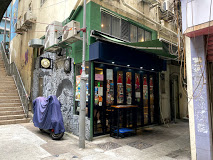
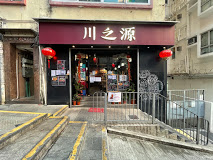
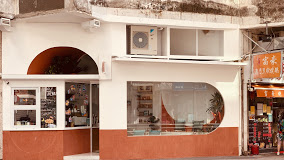
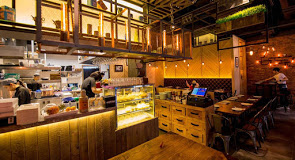
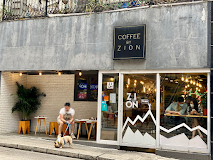
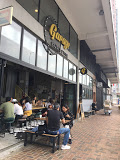
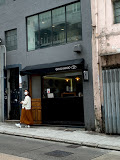
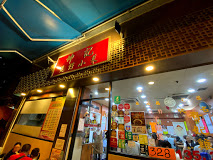
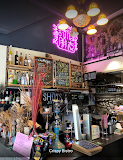
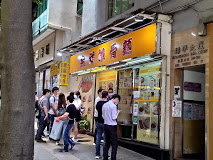
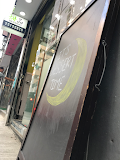
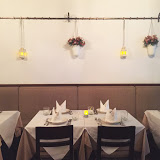
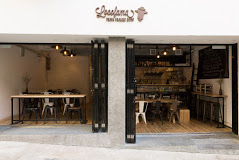
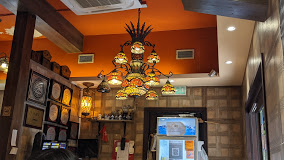
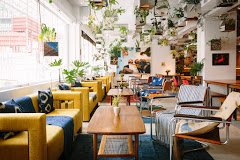
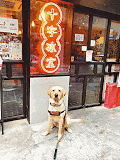
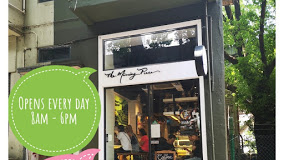
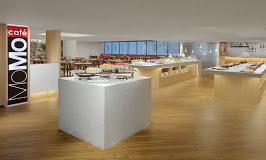
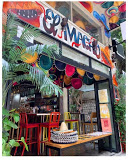
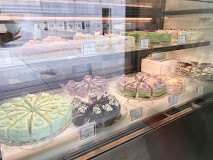
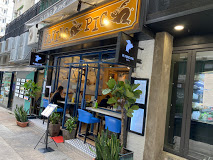
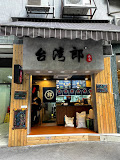
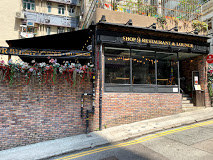
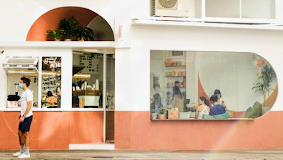
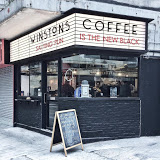
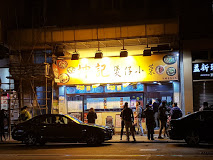
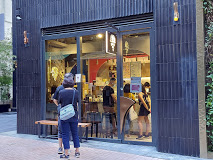

In [108]:
json_data

In [109]:
each_data

39

In [ ]:
import time
from selenium import webdriver
from time import sleep
from selenium.common.exceptions import NoSuchElementException
import json
import sys
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz

main = []




#Print Arguments
print("Passed Arguments are: "+'google_sai-ying-pun_en.json')

f = 'google_sai-ying-pun_en.json'

lan = f.split('_')[-1].split('.')[0]

# driver = webdriver.Chrome(executable_path=r"chromedriver.exe")
# driver.maximize_window()


with open('google_sai-ying-pun_en.json', encoding="utf8") as f:
    json_data = json.load(f)

for each_data in range(len(json_data)):
    for ordr in range(len(json_data[each_data]['order'])):
        try:
            if 'deliveroo.hk' in json_data[each_data]['order'][ordr]:

                ue_link = json_data[each_data]['order'][ordr]
                
                print("deliveroo link:", ue_link)

                if 'en' in sys.argv[1]:
                    try:
                        # toggle language to english
                        ue_link = ue_link.replace('zh', 'en')
                    except:
                        pass

                if 'zh' in sys.argv[1]:
                    try:
                        # toggle language to chinese
                        ue_link = ue_link.replace('en', 'zh')
                    except:
                        pass

                driver.get(ue_link)
                
                try:
                    sleep(0.5)
                    driver.find_element_by_class_name("ccl-022adec8b2f34033").click()
                except:
                    pass

                try:
                    sleep(0.5)
                    driver.find_element_by_class_name("ccl-022adec8b2f34033").click()
                except:
                    pass
                
                try:
                    sleep(0.5)
                    driver.find_element_by_class_name("ccl-caaf537be0dac3d8").click()
                except:
                    pass

                try:
                    restaurant_name = driver.find_element_by_class_name("restaurant__details").find_element_by_tag_name('h1').text
                except:
                    restaurant_name = 'none'
                    
                try:    
                    rating = driver.find_element_by_class_name("orderweb__61671603").text.replace(')','').split('(')[0]
                except:
                    rating = 'none'

                try:
                    total_rating = driver.find_element_by_class_name("orderweb__61671603").text.replace(')','').split('(')[1]
                except:
                    total_rating = 'none'

                try:
                    cusine = driver.find_element_by_class_name("orderweb__8227a377").text.split("\n")
                except:
                    cusine = 'none'

                categories = []
                dish_names = []
                dish_prices = []
                dish_urls = []

                total_categories = len(driver.find_elements_by_class_name("orderweb__47414d10"))

                for _ in np.arange(1,10,0.1):
                    driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight/{_});")
                    sleep(0.1)


                for tc in range(total_categories):
                    categories.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_tag_name('h3').text)
                    
                    len_dish_name = len(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3'))
                    
                    dish_name = []
                    dish_price = []
                    dish_url = []
                    
                    for dn in range(len_dish_name):
                        try:
                            dish_name.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_tag_name('p').text)
                        except:
                            dish_name.append('none')
                        
                        try:
                            dish_price.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_class_name('orderweb__19b2cfab').find_element_by_tag_name('span').text.replace('$',''))
                        except:
                            dish_price.append('none')
                            
                        try:
                            dish_url.append(driver.find_elements_by_class_name("orderweb__47414d10")[tc].find_element_by_class_name('orderweb__b75f90f9').find_elements_by_class_name('orderweb__0eecc2d3')[dn].find_element_by_class_name("orderweb__2cc612e1").find_element_by_class_name('ccl-45bd106b75353ec9').get_attribute('style').split('(')[1].split(')')[0].replace('"','').split('?')[0])
                        except:
                            dish_url.append('none')
                        
                    dish_names.append(dish_name)
                    dish_prices.append(dish_price)
                    dish_urls.append(dish_url)

                print("making dict")
                #making dictonary
                data = {
                 'url': driver.current_url,
                 'restaurant_name': restaurant_name,
                 'rating':rating,
                 'total_rating':total_rating,
                 'cusine':cusine,
                 'categories':categories,
                 'dish_names':dish_names,
                 'dish_prices':dish_prices,
                 'dish_urls':dish_urls,
                 'address':json_data[each_data]['address'],
                 'language': lan,
                 'unique_id': json_data[each_data]['unique_id']
                 }

                district = json_data[each_data]['district']
                language = json_data[each_data]['language']
                
                #append it to main data
                main.append(data)
                print("Making JSON")
                #Open and save in json file
                with open(f"deliveroo_{district}_{lan}.json", 'w', encoding="utf-8") as f:
                          json.dump(main, f,indent=4, ensure_ascii=False)
        except:
            pass